(1260, 19)
Best Parameters: {'activation': 'tanh', 'alpha': 1.0, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'lbfgs'}

Test Accuracy: 0.9682539682539683
Training Accuracy: 0.9900793650793651


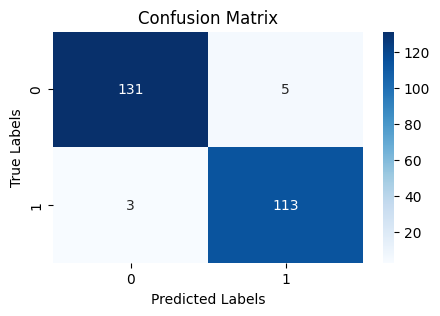


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       0.96      0.97      0.97       116

    accuracy                           0.97       252
   macro avg       0.97      0.97      0.97       252
weighted avg       0.97      0.97      0.97       252



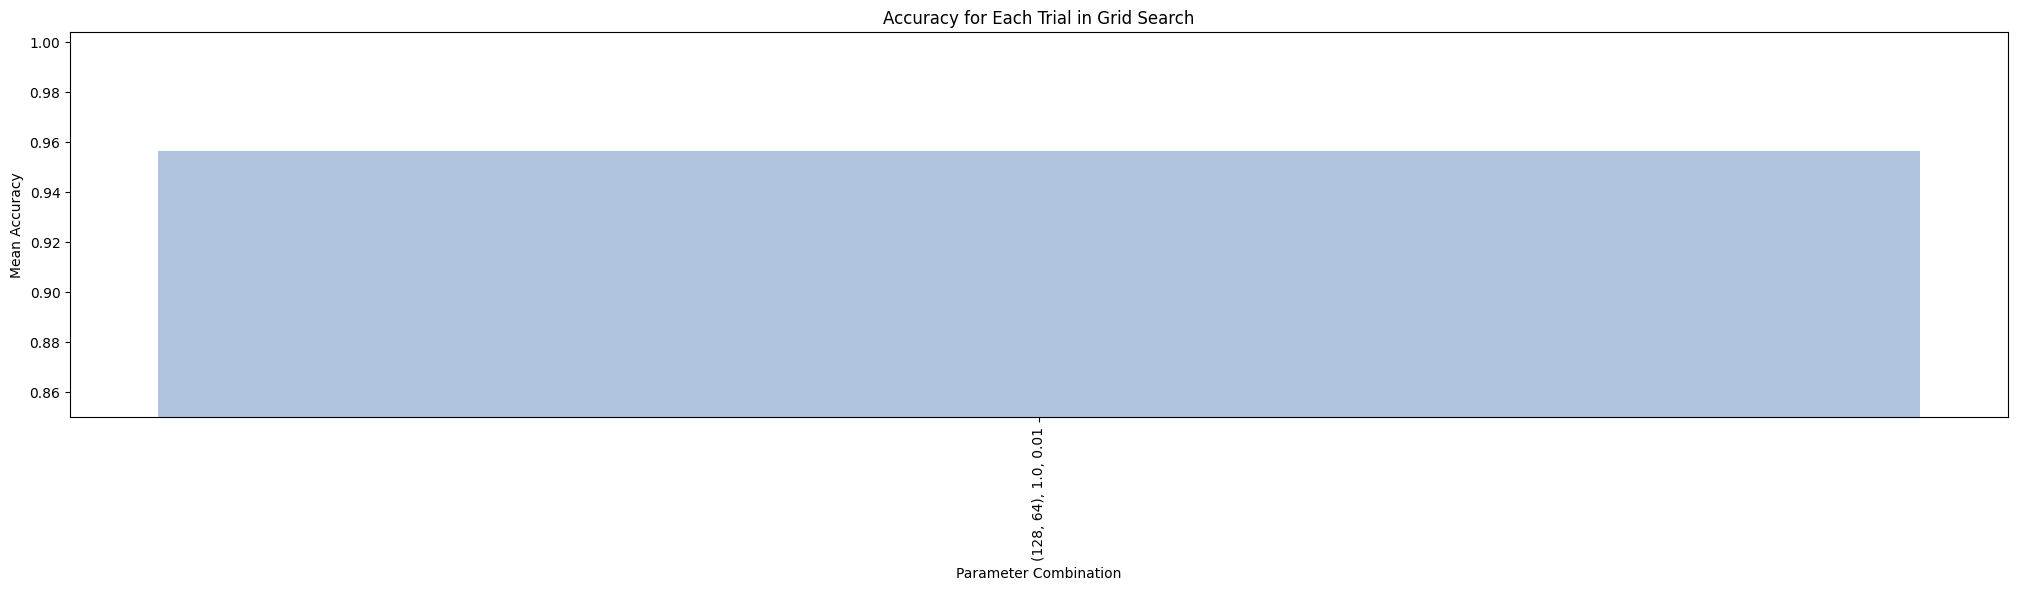

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'transformed_data/decay_input_features_2014.csv'
df = pd.read_csv(file_path)

# # Drop NaNs
# df.dropna(inplace=True)
# Replace NaNs with 0
df.fillna(0, inplace=True) 
print(df.shape)

# Define features (excluding Event ID and Target Label)
ignored_cols = ['Event ID', 'Target Label']
X = df.drop(columns=ignored_cols)
y = df['Target Label']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
# param_grid = {
#     'hidden_layer_sizes': [
#         # (50, 50, 50, 50),
#         (256), (128), (150),
#         (100, 50), (128, 64),
#         (100, 50, 25), (128, 64, 32),
#         (100, 50, 25, 10), (128, 64, 32, 16)
#     ], 
#     'activation': ['tanh'], 
#     'solver': ['lbfgs'], 
#     'alpha': [0.01, 0.1, 1.0],  # Added higher alpha values
#     'learning_rate_init': [0.01, 0.1],
#     'max_iter': [1000, 2000, 5000]  # Increased max_iter further
# }

param_grid = {
  'activation': ['tanh'],
  'alpha': [1.0],
  'hidden_layer_sizes': [(128, 64)],  # Colon added here
  'learning_rate_init': [0.01],
  'max_iter': [1000],
  'solver': ['lbfgs']
}

# Initialize and fit the model with GridSearchCV
mlp = MLPClassifier(random_state=42, verbose=True)
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions and accuracy on test data
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", test_accuracy)

# Predictions and accuracy on training data
y_train_pred = best_model.predict(X_train_scaled)
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting accuracy for each trial in the grid search
results = pd.DataFrame(grid_search.cv_results_)
results_sorted = results.sort_values(by='mean_test_score')

params_labels_sorted = []
for params in results_sorted['params']:
    label = f'{params["hidden_layer_sizes"]}, {params["alpha"]}, {params["learning_rate_init"]}'
    params_labels_sorted.append(label)

plt.figure(figsize=(25, 5))
plt.bar(np.arange(len(results_sorted)), results_sorted['mean_test_score'], color='lightsteelblue')
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Accuracy')
plt.ylim(0.85)
plt.title('Accuracy for Each Trial in Grid Search')
plt.xticks(np.arange(len(results_sorted)), labels=params_labels_sorted, rotation=90)
plt.show()


In [25]:
import joblib

# Save the model to a file
model_filename = 'mlp_model/mlp_decay_best.joblib'
joblib.dump(best_model, model_filename)

# Save the scaler used for normalization
scaler_filename = 'mlp_model/scaler_best.joblib'
joblib.dump(scaler, scaler_filename)


['mlp_model/scaler_best.joblib']